In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
font = {'size':12}
plt.rc('font', **font)

In [2]:
data_titanic = pd.read_csv("train.csv", delimiter=',')
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
ave_age = round(data_titanic['Age'].mean())
data_titanic['Age']=data_titanic['Age'].fillna(ave_age)
data_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data_titanic['Cabin']=data_titanic['Cabin'].fillna('NE')
data_titanic['Embarked']=data_titanic['Embarked'].fillna('NE')
data_titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
data_titanic['Survived']=data_titanic['Survived'].map({
    0:'No',
    1:'Yes'
})
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NE,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NE,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NE,S


In [8]:
 data_titanic['Embarked']=data_titanic['Embarked'].map({
     'S':'Southampton',
     'C':'Cherbourg',
     'Q':'Queenstown'
 })
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NE,Southampton
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NE,Southampton
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NE,Southampton


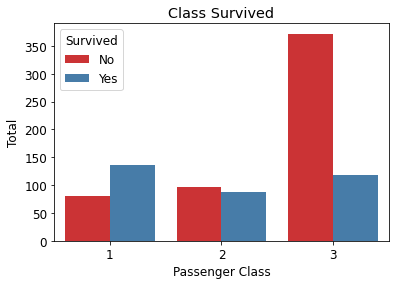

In [9]:
# Dashboard about survived for class
data_titanic.groupby(['Pclass', 'Survived'])['Survived'].count()
ax=sns.countplot(x='Pclass', hue='Survived', palette='Set1', data=data_titanic)
ax.set(title='Class Survived', xlabel='Passenger Class', ylabel='Total')
plt.show()

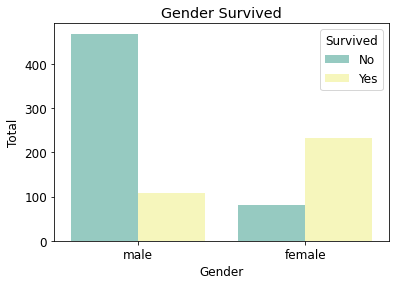

In [10]:
data_titanic.groupby(['Sex', 'Survived'])['Survived'].count()
ax=sns.countplot(x='Sex', hue='Survived', palette='Set3', data=data_titanic)
ax.set(title='Gender Survived', xlabel='Gender', ylabel='Total')
plt.show()

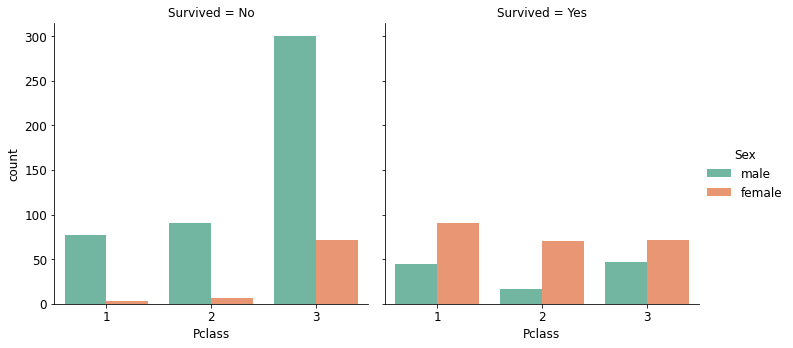

In [11]:
ax=sns.catplot(x='Pclass', hue='Sex', col='Survived', 
               palette='Set2', data=data_titanic, kind="count")
plt.show()

In [12]:
# Funtion to put label on dashboard 
def autolabel (bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

In [13]:
# mean age of every cabin
aux=data_titanic.pivot_table(values='Age', index='Cabin', aggfunc='mean')
aux

,Age
Cabin,
A10,36.00000
A14,30.00000
A16,48.00000
A19,30.00000
A20,49.00000
...,...
F38,30.00000
F4,2.50000
G6,14.75000


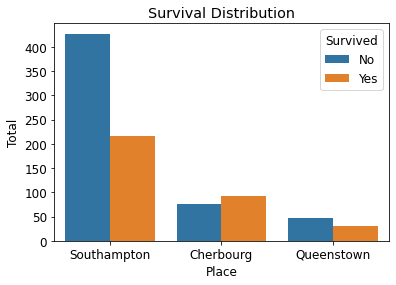

In [14]:
# Survival distribution according to boarding place
ax=sns.countplot(x='Embarked', hue='Survived', data=data_titanic)
ax.set(title='Survival Distribution', xlabel='Place', ylabel='Total')
plt.show()

In [15]:
# Table with age interval under 18 years
interval_age1 = data_titanic[data_titanic['Age']<18].pivot_table(values='Age', index='Pclass', aggfunc='count')
interval_age1

,Age
Pclass,
1,12
2,23
3,78


In [16]:
# Table with age interval between 18 to 30
interval_age2 = data_titanic[(data_titanic['Age']>=18) & (data_titanic['Age']<=30)].pivot_table(values='Age', index='Pclass', aggfunc='count')
interval_age2

,Age
Pclass,
1,79
2,84
3,310


In [17]:
# Table with age interval between 30 to 40
interval_age3 = data_titanic[(data_titanic['Age']>30) & (data_titanic['Age']<=40)].pivot_table(values='Age', index='Pclass', aggfunc='count')
interval_age3

,Age
Pclass,
1,49
2,43
3,63


In [18]:
# Table with age interval between 40 to 50
interval_age4 = data_titanic[(data_titanic['Age']>40) & (data_titanic['Age']<=50)].pivot_table(values='Age', index='Pclass', aggfunc='count')
interval_age4

,Age
Pclass,
1,37
2,19
3,30


In [19]:
# Table with age up to 50 years
interval_age5 = data_titanic[(data_titanic['Age']>50)].pivot_table(values='Age', index='Pclass', aggfunc='count')
interval_age5

,Age
Pclass,
1,39
2,15
3,10


In [20]:
def funcPie(values):
    val = iter(values)
    return lambda pct: f"{pct:.1f}% ({next(val)})"

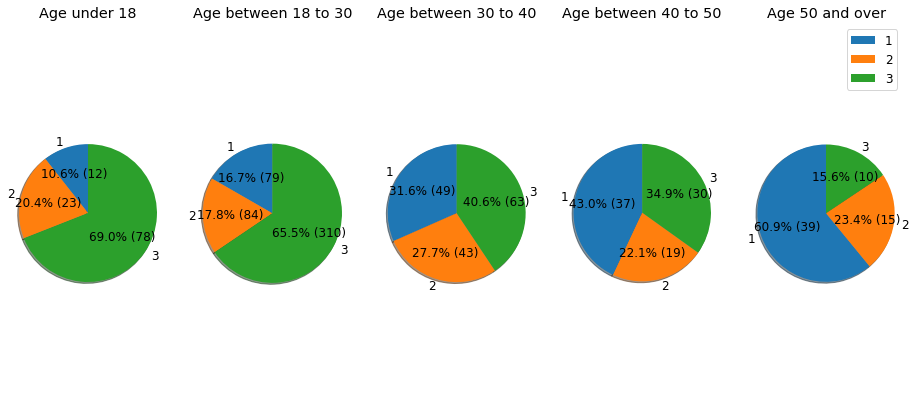

In [21]:
# Porcentage of Age groups per class
fig, ax=plt.subplots(1, 5, figsize=(16,7))
ax[0].pie(interval_age1['Age'].to_list(), labels=interval_age1.index.to_list(),
         autopct=funcPie(interval_age1['Age'].to_list()), shadow=True, startangle=90)
ax[0].axis('equal')
ax[0].set_title('Age under 18')

ax[1].pie(interval_age2['Age'].to_list(), labels=interval_age2.index.to_list(),
         autopct=funcPie(interval_age2['Age'].to_list()), shadow=True, startangle=90)
ax[1].axis('equal')
ax[1].set_title('Age between 18 to 30')

ax[2].pie(interval_age3['Age'].to_list(), labels=interval_age3.index.to_list(),
         autopct=funcPie(interval_age3['Age'].to_list()), shadow=True, startangle=90)
ax[2].axis('equal')
ax[2].set_title('Age between 30 to 40')

ax[3].pie(interval_age4['Age'].to_list(), labels=interval_age4.index.to_list(),
         autopct=funcPie(interval_age4['Age'].to_list()), shadow=True, startangle=90)
ax[3].axis('equal')
ax[3].set_title('Age between 40 to 50')

ax[4].pie(interval_age5['Age'].to_list(), labels=interval_age5.index.to_list(),
         autopct=funcPie(interval_age5['Age'].to_list()), shadow=True, startangle=90)
ax[4].axis('equal')
ax[4].set_title('Age 50 and over')

plt.legend()
plt.show()
